In [ ]:
# LINEAR REGRESSION | DEGREE N | VARIABLE 1

In [388]:
# importing necessary libraries and converting to suitable format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [389]:
file = pd.read_csv("cubic_dataset.csv", header=None)

In [390]:
# reading and converting to suitable format
file = file.to_numpy()
dimensions = np.shape(file)[1] - 1
n = np.shape(file)[0]
X = file[:, 0:dimensions]
Y = np.reshape(file[:, dimensions], (n, 1))

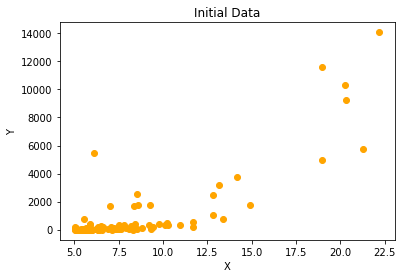

In [391]:
# Plotting
plt.scatter(X, Y, color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Initial Data")
plt.show()

In [392]:
# parameters initialization
# cubic interpolation
degree = 3 
t = np.random.rand(degree+1, 1)

In [393]:
# The gradient descent function for linear equations
def gradient_descent(X, Y, theta, learning_rate, num_iters, degree=1):
    calc_x = np.copy(X)
    first_column = np.copy(X)
    n = np.shape(X)[0]
    
#     appending higher powers
    for i in range(2, degree+1):
        calc_x = np.append(calc_x, first_column ** i, axis=1)   
        
#     Stacking column of 1s in front
    ones = np.ones((n, 1))
    calc_x = np.hstack((ones, calc_x))
    
#     Normalization
    x_max = np.max(calc_x, axis=0)
    calc_x = calc_x / x_max
    
    for i in range(num_iters):
        # calculate the current prediction
        prediction = np.matmul(calc_x, theta)
        # obtain the error
        error_vector = Y - prediction
        # Update the thetas. Here I've vectorized the operation of updating thetas
        theta = theta + (learning_rate)/(n) * np.matmul(np.transpose(calc_x), error_vector)
        if (i == num_iters-1):
            print("Final error = ", np.sum(error_vector))
    return theta, x_max

In [394]:
thetas, xmax = gradient_descent(X, Y, t, 0.5, 5000, degree) # fitting a parabola
print(thetas)

Final error =  3.1432052128792805
[[  983.80668903]
 [-4944.41182141]
 [ 4093.44462245]
 [11914.68091804]]


In [395]:
# The prediction function. It predicts Y from respective X and thetas
def predict(X, thetas, xmax):
    """X is a nxd dimensional array and theta is a dx1 dimensional"""
    n = np.shape(X)[0]
    degree = np.shape(thetas)[0] - 1
    
    calc_x = np.copy(X)
    for i in range(2, degree+1):
        calc_x = np.append(calc_x, (calc_x[:, 0:1]) ** i, axis=1)
    ones = np.ones((n, 1))
    calc_x = np.hstack((ones, calc_x))
    
    calc_x = calc_x / xmax
    return np.matmul(calc_x, thetas)

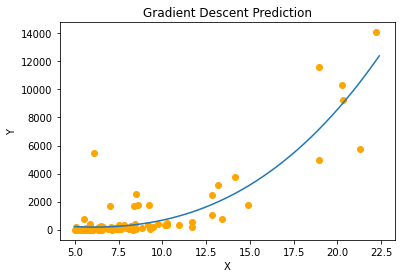

In [396]:
#Prepare to plot the prediction line
rows_xs = np.arange(5, 22.5, 0.1)
xs = np.linspace(rows_xs, rows_xs, 1)
xs = np.transpose(xs)
ys = predict(xs, thetas, x_max)

plt.plot(xs, ys)
plt.scatter(X, Y, color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Descent Prediction")
plt.show()

In [397]:
# ====================NORMAL EQUATIONS=====================

# Normal equation function. It returns suitable value for theta
def normal_equations(X, Y, degree):
    """Given X, Y and thetas, calculates optimal values of thetas"""
    calc_x = np.copy(X)
    first_column = np.copy(X)
    n = np.shape(X)[0]

#     appending higher powers
    for i in range(2, degree+1):
        calc_x = np.append(calc_x, first_column ** i, axis=1)   

#     Stacking column of 1s in front
    ones = np.ones((n, 1))
    calc_x = np.hstack((ones, calc_x))

#     Normalization
    x_max = np.max(calc_x, axis=0)
    calc_x = calc_x / x_max
    
    X_T = np.linalg.pinv(calc_x)
    intermediate = np.linalg.pinv(np.matmul(X_T, calc_x))
    thetas = np.matmul(np.matmul(intermediate, X_T), Y)
    return thetas, x_max

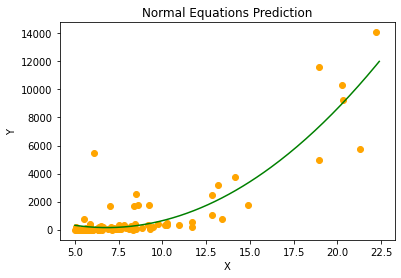

In [398]:
#Plotting the prediction curve
theta2, xmax = normal_equations(X, Y, 2)
ys2 = predict(xs, theta2, xmax)
plt.plot(xs, ys2, color="green")
plt.scatter(X, Y, color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Normal Equations Prediction")
plt.show()